Reads output from 'top ibn1' to make  ram use vs. process 2D plot

In [1]:
inpF='top_ibn1.out'
inpF='xx.out'
!ls -l $inpF

def memStr2Gb(x): #------------------
    valGb=-1. 
    if 'g' in x:
        valGb=float(x[:-1])
    elif 'm' in x:
        valGb=float(x[:-1])/1024.
    elif 'k' in x:
        valGb=float(x[:-1])/1024./1024.
    else:
        valGb=float(x[:-1])//1024./1024./1024.
    return valGb
print("test  memStr2Gb=", memStr2Gb('12.3k'))

def timeStr2sec(st): #------------------
    x1 = st.split(':')
    #print (st, len(x1 ))
    t=0.
    if len(x1)==3:
        t=float(x1[0])*3600. +float(x1[1])*60 +float(x1[2])
    elif len(x1)==2:
        t=float(x1[0])*60 +float(x1[1])
    else:
        t=float(x1[0])
    return t
print("test  timeStr2sec=", timeStr2sec('11:12'))

-rw-r----- 1 balewski rhstar 2160 Sep 23 17:14 xx.out
test  resStr2Gb= 1.1730194091796876e-05
test  timeStr2sec= 672.0


In [2]:
# parse input text, produce  vectors
fd=open(inpF)
skip=1
nj=0
sumRam=0
ramV=[]
timeV=[]
for line in fd:
    #print(line)
    if skip :
        if 'Mem' in line:
            avaRamGb=memStr2Gb(line.split()[1])
            print('avaliable RAM/GB=',avaRamGb)
        if "PID"  in line:
            skip=0
            headL=line.split()
            print(headL)
        continue
    if len(line)<=1:
       break

    nj+=1
    if nj==1:
        print(line)
    xL=line.split()
    #print(len(line))
    userN=xL[1]
    resGb=memStr2Gb(xL[5])
    timeMin=timeStr2sec(xL[10])/60.
    #print(userN,resGb,'%.3f'%timeMin)
    sumRam+=resGb
    ramV.append(resGb)
    timeV.append(timeMin)
    #break
print("num proc=%d  sumRam=%.1f Gb"%(nj,sumRam))

avaliable RAM/GB= 125.56582260131836
['PID', 'USER', 'PR', 'NI', 'VIRT', 'RES', 'SHR', 'S', '%CPU', '%MEM', 'TIME+', 'COMMAND']
10328 alicesgm  20   0 2088m 1.2g  21m R 100.1  0.9  83:12.67 aliroot           

num proc=21  sumRam=18.0 Gb


(-10, 250.0)

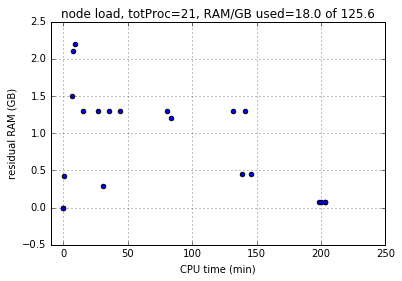

In [4]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pylab as plt

plt.scatter(timeV,ramV)
plt.grid(True)
plt.xlabel('CPU time (min)')
plt.ylabel('residual RAM (GB)')
plt.title('node load, totProc=%d, RAM/GB used=%.1f of %.1f'%(nj,sumRam,avaRamGb))
#plt.ylim(0,2.2)
plt.xlim(-10,)